# Лаба 6

In [777]:
import numpy as np

In [778]:
import matplotlib.pyplot as plt

варианты точек для построения В-сплайнов. Надо будет построить сплайны 2-го и 4-го порядков.

Вариант 24

    1        0.993    0.075    
    2        0.968    0.146    
    3        0.926    0.210    
    4        0.871    0.267    
    5        0.800    0.311    
    6        0.714    0.341    
    7        0.616    0.353    
    8        0.505    0.341    
    9        0.377    0.298    
    10       0.214    0.197

In [779]:
P = np.array([[0.993,0.075],[0.968,0.146],[0.926,0.210],[0.871,0.267],[0.800,0.311],\
              [0.714,0.341],[0.616,0.353],[0.505,0.341],[0.377,0.298], [0.214,0.197]])

In [780]:
def B(x, k, i, t):
    if k == 0:
        return 1.0 if t[i] <= x < t[i+1] else 0.0
    if t[i+k] == t[i]:
        c1 = 0.0
    else:
        c1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)
    if t[i+k+1] == t[i+1]:
        c2 = 0.0
    else:
        c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)
    return c1 + c2

In [781]:
def bspline(x, t, c, k):
    n = len(t) - k - 1
    assert (n >= k+1) and (len(c) >= n)
    return sum(c[i] * B(x, k, i, t) for i in range(n))

In [782]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [783]:
k=1
t = np.array([0,0,1,2,3,4,5,6,7,8,9,9])

In [784]:
xx = np.linspace(0,9,900, endpoint=False)
spl = np.array([bspline(x, t, P ,k) for x in xx])

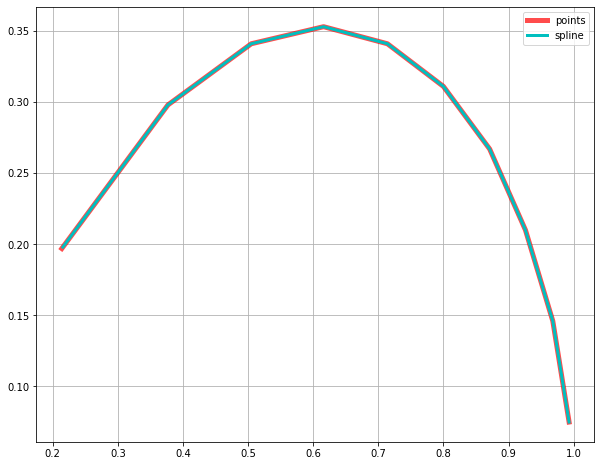

In [788]:
fig, ax = plt.subplots()
ax.plot(P.T[0], P.T[1], 'r-', lw=5, alpha=0.7,label='points')
ax.plot(spl.T[0], spl.T[1], 'c-', lw=3,label='spline')
ax.grid(True)
ax.legend(loc='best')
plt.show()

In [797]:
k=3
t = np.array([0,0,0,0,1,2,3,4,5,6,7,7,7,7])

In [798]:
xx = np.linspace(0,7,700, endpoint=False)
spl = np.array([bspline(x, t, P ,k) for x in xx])

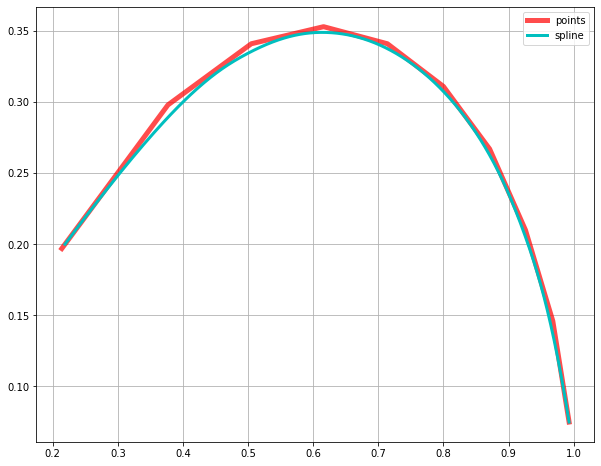

In [799]:
fig, ax = plt.subplots()
ax.plot(P.T[0], P.T[1], 'r-', lw=5, alpha=0.7,label='points')
ax.plot(spl.T[0], spl.T[1], 'c-', lw=3,label='spline')
ax.grid(True)
ax.legend(loc='best')
plt.show()